In [54]:
from qiskit_aer import AerSimulator

backend_sim = AerSimulator()

from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend=backend_sim)
from qiskit.primitives import BackendEstimatorV2
estimator_sim = BackendEstimatorV2(backend=backend_sim)


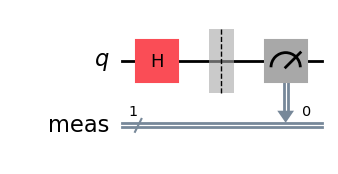

In [55]:
from qiskit import QuantumCircuit
 
qcoin = QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()
 
qcoin.draw("mpl")

In [56]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend_sim.target
pm = generate_preset_pass_manager(
    target=target,
    optimization_level=3)

qc_isa = pm.run(qcoin)

In [57]:
job = sampler_sim.run([qc_isa])
res = job.result()

counts = res[0].data.meas.get_counts()


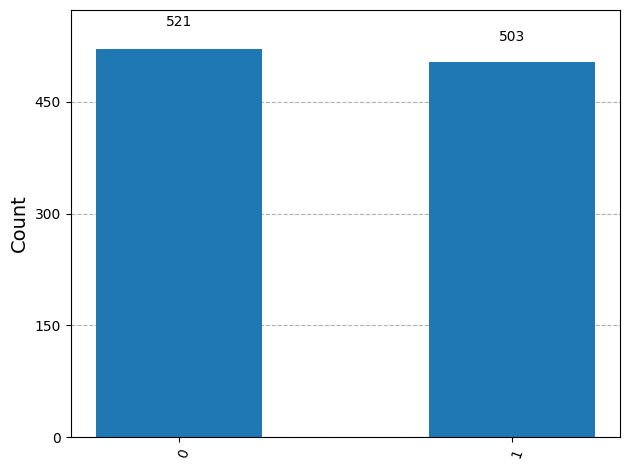

In [58]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

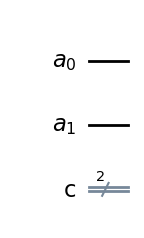

In [61]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(2, 'a')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

qc.draw('mpl')

In [63]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

QiskitRuntimeService.save_account(channel = 'ibm_quantum', token = '0e3f62fe37477eb893eebae877b89357ccebb7b90f2c9dea62f051e6ff20dd0d1fcd3900f98688c09118b6a445e2f6e056f001a41d93c732881ab907f4979646', overwrite = True, set_as_default = True)
service = QiskitRuntimeService(channel='ibm_quantum', instance='ibm-q/open/main')

/tmp/ipykernel_24010/3822721015.py:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService(channel='ibm_quantum', instance='ibm-q/open/main')


IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. This version of platform has been sunset. Create an account or sign in to the upgraded IBM Quantum Platform at https://quantum.cloud.ibm.com, Error code: 3447.'